In [17]:
pip install tensorflow


### Tugas praktikum


In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi
train_images, test_images = train_images / 255.0, test_images / 255.0

# Model CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    train_images, train_labels,
    epochs=20,
    validation_data=(test_images, test_labels)
)

# Evaluasi
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Akurasi testing: {test_acc:.4f}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 127s 78ms/step - accuracy: 0.3627 - loss: 1.8444 - val_accuracy: 0.5130 - val_loss: 1.3634
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 76ms/step - accuracy: 0.5626 - loss: 1.2454 - val_accuracy: 0.5745 - val_loss: 1.2295
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6296 - loss: 1.0648 - val_accuracy: 0.4855 - val_loss: 1.4694
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6769 - loss: 0.9311 - val_accuracy: 0.5663 - val_loss: 1.4330
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 76ms/step - accuracy: 0.7034 - loss: 0.8467 - val_accuracy: 0.6126 - val_loss: 1.2182
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7313 - loss: 0.7744 - val_accuracy: 0.7228 - val_loss: 0.8043
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.7573 - loss: 0.7058 - val_accuracy: 0.7064 - val_loss: 0.8738
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 

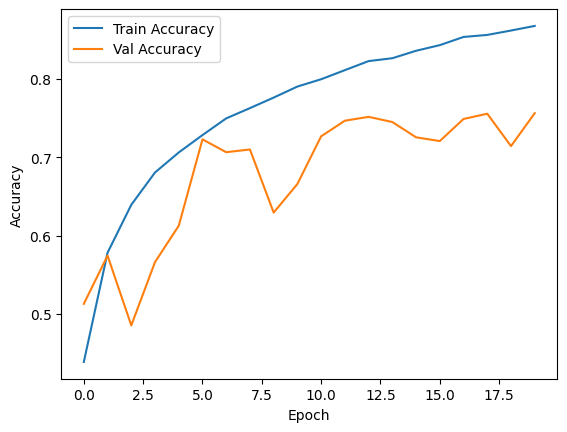

In [19]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


- Buatlah model CNN untuk klasifikasi dataset MNIST.

In [20]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape & normalisasi
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test  = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Model CNN MNIST
model_mnist = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model_mnist.summary()

# Compile
model_mnist.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history_mnist = model_mnist.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1
)

# Evaluate
loss, acc = model_mnist.evaluate(X_test, y_test)
print(f"Akurasi Testing MNIST: {acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 52s 118ms/step - accuracy: 0.7803 - loss: 0.6973 - val_accuracy: 0.9760 - val_loss: 0.0757
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 57s 136ms/step - accuracy: 0.9643 - loss: 0.1232 - val_accuracy: 0.9852 - val_loss: 0.0505
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.9750 - loss: 0.0869 - val_accuracy: 0.9885 - val_loss: 0.0404
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.9799 - loss: 0.0669 - val_accuracy: 0.9887 - val_loss: 0.0382
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 113ms/step - accuracy: 0.9819 - loss: 0.0605 - val_accuracy: 0.9902 - val_loss: 0.0382
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 115ms/step - accuracy: 0.9837 - loss: 0.0504 - val_accuracy: 0.9892 - val_loss: 0.0389
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 49s 116ms/step - accuracy: 0.9866 - loss: 0.0432 - val_accuracy: 0.9915 - val_loss: 0.0335
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.9877 - loss: 0